In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu

In [2]:
group_metadata = pd.read_csv('../metadata/metadata_file.tsv', sep = '\t')

In [3]:
group_metadata_filtered = group_metadata[['sample_id', 'group']]
group_metadata_filtered.head()

sample_id    group
0  SRR5935827  control
1  SRR5935812  control
2  SRR5935833  control
3  SRR5946628  control
4  SRR5947048  control

In [15]:
out_test_MGYG000000196 = pd.read_csv('../out_test_MGYG000000196/filtered_output/combined_with_SRR.csv')

In [16]:
out_test_MGYG000000196.head()

ID  Pe_F  Pe_R  Pe_ratio  Span_F  \
0      MGYG000000196_10:24633-24653-24719-24739     2    12      0.86       1   
1  MGYG000000196_12:177541-177564-177827-177850    42    12      0.22      17   
2  MGYG000000196_12:177541-177564-177827-177850    34    18      0.35      15   
3  MGYG000000196_12:177541-177564-177827-177850    34    44      0.56      17   
4                MGYG000000196_18:71-88-183-200    28     6      0.18      25   

   Span_R  Span_ratio      SRR_ID  
0       6        0.86  SRR5935864  
1       4        0.19  SRR5936178  
2       9        0.38  SRR5936197  
3       7        0.29  SRR5947096  
4       5        0.17  SRR5947096

In [17]:
out_test_MGYG000000196.shape

(51, 8)

In [18]:
merged = pd.merge(group_metadata_filtered, out_test_MGYG000000196, left_on='sample_id', right_on = 'SRR_ID',
                  how='right')

In [24]:
merged.head()

sample_id    group                                            ID  Pe_F  \
0  SRR5935864       UC      MGYG000000196_10:24633-24653-24719-24739     2   
1  SRR5936178       UC  MGYG000000196_12:177541-177564-177827-177850    42   
2  SRR5936197  control  MGYG000000196_12:177541-177564-177827-177850    34   
3  SRR5947096       UC  MGYG000000196_12:177541-177564-177827-177850    34   
4  SRR5947096       UC                MGYG000000196_18:71-88-183-200    28   

   Pe_R  Pe_ratio  Span_F  Span_R  Span_ratio      SRR_ID  
0    12      0.86       1       6        0.86  SRR5935864  
1    12      0.22      17       4        0.19  SRR5936178  
2    18      0.35      15       9        0.38  SRR5936197  
3    44      0.56      17       7        0.29  SRR5947096  
4     6      0.18      25       5        0.17  SRR5947096

/var/folders/0g/jffzlx7x0v37frp3q4ssdnp80000gn/T/ipykernel_9728/426683796.py:5: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.tight_layout()
/var/folders/0g/jffzlx7x0v37frp3q4ssdnp80000gn/T/ipykernel_9728/426683796.py:5: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.tight_layout()


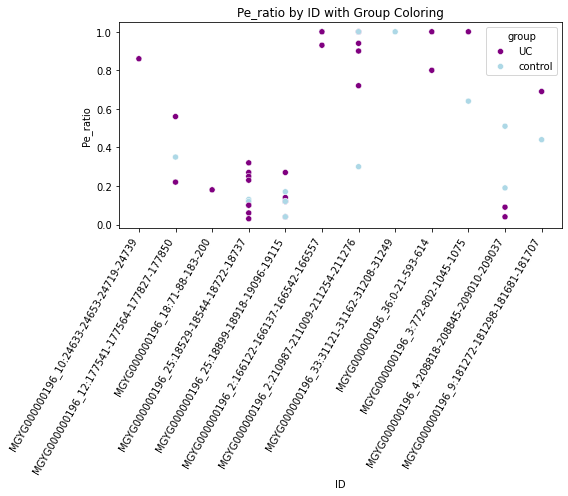

In [35]:

plt.figure(figsize=(8,7))
sns.scatterplot(data=merged, x='ID', y='Pe_ratio', hue='group', palette={'UC':'purple','control':'lightblue'})
plt.xticks(rotation=60, ha = 'right')
plt.title("Pe_ratio by ID with Group Coloring")
plt.tight_layout()
plt.show()

In [41]:
#logit, arcsin transform
out_all = pd.read_csv('../combined_with_SRR_all.csv')

In [42]:
len(out_all['ID'].unique())

329

In [86]:
out_all
#add these new columns: MGA ID, inverton ID, Numbers in controls, Numbers in UCs, species
#Pe_F: The number of reads supprting the F orientation with paired-end information
#Pe_R: The number of reads supprting the R orientation with paired-end information
#Pe_ratio: Pe_R/(Pe_F + Pe_R). The percent of reads supporting the R orientation with the paired-end method
#Span_F: The number of reads supporting the F orientation spanning the inverted repeat by at least 10 bp on either side
#Span_R: The number of reads supporting the R orientation spanning the inverted repeat by at least 10 bp on either side
#Span_ratio: Span_R/(Span_F + Span_R). The percent of reads supporting the R orientation with the spanning method.
#criterial: at least 1% of reads support the R orientation with a minimum Pe_R > 5 and Span_R > 3.

ID  Pe_F  Pe_R  Pe_ratio  \
0           MGYG000000003_13:4795-4812-5460-5477     4     8      0.67   
1           MGYG000000003_13:4795-4812-5460-5477     4    22      0.85   
2           MGYG000000003_13:4795-4812-5460-5477    20    20      0.50   
3           MGYG000000003_13:4795-4812-5460-5477     0    12      1.00   
4    MGYG000000003_3:215021-215039-215218-215236     2    42      0.95   
..                                           ...   ...   ...       ...   
941             MGYG000004797_62:687-714-879-906    50    12      0.19   
942             MGYG000004797_62:687-714-879-906   116    12      0.09   
943             MGYG000004797_62:687-714-879-906   308    12      0.04   
944     MGYG000004797_72:20631-20647-20761-20777     4    22      0.85   
945        MGYG000004879_163:1423-1435-2039-2051     0    16      1.00   

     Span_F  Span_R  Span_ratio      SRR_ID          MG_ID        MGYG_ID  \
0         2       4        0.67  SRR5936013  MGYG000000003  MGYG000000003   
1         2       9        0.82  SRR5936014  MGYG000000003  MGYG000000003   
2         7      10        0.59  SRR5935889  MGYG000000003  MGYG000000003   
3         0       6        1.00  SRR5946736  MGYG000000003  MGYG000000003   
4         0      15        1.00  SRR5935915  MGYG000000003  MGYG000000003   
..      ...     ...         ...         ...            ...            ...   
941      29       6        0.17  SRR5946628  MGYG000004797  MGYG000004797   
942      50       4        0.07  SRR5946832  MGYG000004797  MGYG000004797   
943     141       7        0.05  SRR5936110  MGYG000004797  MGYG000004797   
944       1       8        0.89  SRR5935958  MGYG000004797  MGYG000004797   
945       0       5        1.00  SRR5946762  MGYG000004879  MGYG000004879   

                            suffix  
0           13:4795-4812-5460-5477  
1           13:4795-4812-5460-5477  
2           13:4795-4812-5460-5477  
3           13:4795-4812-5460-5477  
4    3:215021-215039-215218-215236  
..                             ...  
941             62:687-714-879-906  
942             62:687-714-879-906  
943             62:687-714-879-906  
944     72:20631-20647-20761-20777  
945        163:1423-1435-2039-2051  

[946 rows x 11 columns]

In [90]:
metadata_patients = pd.read_csv('../metadata/metadata_file.tsv', sep = '\t')
metadata_subset = metadata_patients[["sample_id", "group"]]

In [92]:
combined_out_all = pd.merge(
    out_all,
    metadata_subset,
    left_on="SRR_ID",   
    right_on="sample_id", 
    how="left" 
)

In [96]:
#combined_out_all logit transform
epsilon = 1e-6  # avoid 0 or 1
combined_out_all["Pe_ratio_logit"] = np.log((combined_out_all["Pe_ratio"] + epsilon) / (1 - combined_out_all["Pe_ratio"] + epsilon))
#arcsin 
combined_out_all["Pe_ratio_arcsin"] = np.arcsin(np.sqrt(combined_out_all["Pe_ratio"]))

combined_out_all

ID  Pe_F  Pe_R  Pe_ratio  \
0           MGYG000000003_13:4795-4812-5460-5477     4     8      0.67   
1           MGYG000000003_13:4795-4812-5460-5477     4    22      0.85   
2           MGYG000000003_13:4795-4812-5460-5477    20    20      0.50   
3           MGYG000000003_13:4795-4812-5460-5477     0    12      1.00   
4    MGYG000000003_3:215021-215039-215218-215236     2    42      0.95   
..                                           ...   ...   ...       ...   
941             MGYG000004797_62:687-714-879-906    50    12      0.19   
942             MGYG000004797_62:687-714-879-906   116    12      0.09   
943             MGYG000004797_62:687-714-879-906   308    12      0.04   
944     MGYG000004797_72:20631-20647-20761-20777     4    22      0.85   
945        MGYG000004879_163:1423-1435-2039-2051     0    16      1.00   

     Span_F  Span_R  Span_ratio      SRR_ID          MG_ID        MGYG_ID  \
0         2       4        0.67  SRR5936013  MGYG000000003  MGYG000000003   
1         2       9        0.82  SRR5936014  MGYG000000003  MGYG000000003   
2         7      10        0.59  SRR5935889  MGYG000000003  MGYG000000003   
3         0       6        1.00  SRR5946736  MGYG000000003  MGYG000000003   
4         0      15        1.00  SRR5935915  MGYG000000003  MGYG000000003   
..      ...     ...         ...         ...            ...            ...   
941      29       6        0.17  SRR5946628  MGYG000004797  MGYG000004797   
942      50       4        0.07  SRR5946832  MGYG000004797  MGYG000004797   
943     141       7        0.05  SRR5936110  MGYG000004797  MGYG000004797   
944       1       8        0.89  SRR5935958  MGYG000004797  MGYG000004797   
945       0       5        1.00  SRR5946762  MGYG000004879  MGYG000004879   

                            suffix   sample_id    group  Pe_ratio_logit  \
0           13:4795-4812-5460-5477  SRR5936013  control        0.708184   
1           13:4795-4812-5460-5477  SRR5936014  control        1.734596   
2           13:4795-4812-5460-5477  SRR5935889  control        0.000000   
3           13:4795-4812-5460-5477  SRR5946736       UC       13.815512   
4    3:215021-215039-215218-215236  SRR5935915  control        2.944420   
..                             ...         ...      ...             ...   
941             62:687-714-879-906  SRR5946628  control       -1.450006   
942             62:687-714-879-906  SRR5946832       UC       -2.313625   
943             62:687-714-879-906  SRR5936110       UC       -3.178030   
944     72:20631-20647-20761-20777  SRR5935958  control        1.734596   
945        163:1423-1435-2039-2051  SRR5946762  control       13.815512   

     Pe_ratio_arcsin  
0           0.958857  
1           1.173097  
2           0.785398  
3           1.570796  
4           1.345283  
..               ...  
941         0.451027  
942         0.304693  
943         0.201358  
944         1.173097  
945         1.570796  

[946 rows x 15 columns]

In [116]:

results = []
df = combined_out_all
for mag_id, sub_df in df.groupby("ID"):
    disease_vals = sub_df[sub_df["group"] == "UC"]["Pe_ratio_logit"]
    control_vals = sub_df[sub_df["group"] == "control"]["Pe_ratio_logit"]
    
    if len(disease_vals) > 0 and len(control_vals) > 0:
        # t-test
        t_stat, p_val = ttest_ind(disease_vals, control_vals, equal_var=False)
        # Mann-Whitney
        u_stat, p_val_u = mannwhitneyu(disease_vals, control_vals, alternative='two-sided')
        
        results.append({
            "ID": mag_id,
            "t_stat": t_stat,
            "t_pval": p_val,
            "U_stat": u_stat,
            "U_pval": p_val_u
        })

results_df = pd.DataFrame(results)

/Users/dongminjin/miniconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1081: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Users/dongminjin/miniconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1081: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Users/dongminjin/miniconda3/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [121]:
results_df

ID    t_stat    t_pval  U_stat  \
0           MGYG000000003_13:4795-4812-5460-5477       NaN       NaN     3.0   
1   MGYG000000013_13:129949-129975-130209-130235       NaN       NaN     3.5   
2    MGYG000000013_5:545937-545967-546089-546119       NaN       NaN     0.5   
3        MGYG000000029_9:82389-82429-82487-82527       NaN       NaN     0.5   
4    MGYG000000044_1:986746-986762-986932-986948       NaN       NaN     1.0   
..                                           ...       ...       ...     ...   
95      MGYG000004658_58:35559-35574-35860-35875       NaN       NaN     0.5   
96      MGYG000004658_59:34337-34362-34605-34630       NaN       NaN     2.0   
97             MGYG000004741_257:207-223-586-602 -1.675789  0.114877    28.5   
98       MGYG000004797_5:81678-81707-81851-81880  5.712918  0.000496    24.0   
99              MGYG000004797_62:687-714-879-906 -2.345414  0.176292     0.0   

      U_pval  
0   0.500000  
1   1.000000  
2   1.000000  
3   1.000000  
4   1.000000  
..       ...  
95  1.000000  
96  1.000000  
97  0.379408  
98  0.010471  
99  0.333333  

[100 rows x 5 columns]

In [130]:
plot_df = combined_out_all.merge(results_df[["ID", "U_pval"]], on="ID", how="left")
plot_df_filtered = plot_df.dropna(subset=["U_pval"])

plot_df_filtered = plot_df_filtered.copy()  
plot_df_filtered.loc[:, "significance"] = plot_df_filtered["U_pval"].apply(
    lambda p: "ns" if pd.isna(p) or p > 0.05 else "*"
)

In [152]:
#total number that did mann-whitney test
len(plot_df_filtered['ID'].unique())

100

In [138]:
significant_df = plot_df_filtered[plot_df_filtered["significance"] == "*"]

In [150]:
#significant inverton number
len(significant_df['ID'].unique())

2

/var/folders/0g/jffzlx7x0v37frp3q4ssdnp80000gn/T/ipykernel_2937/974324199.py:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:.25'` for the same effect.

  sns.stripplot(data=significant_df, x="ID", y="Pe_ratio", hue="group",
/var/folders/0g/jffzlx7x0v37frp3q4ssdnp80000gn/T/ipykernel_2937/974324199.py:15: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.tight_layout()
/var/folders/0g/jffzlx7x0v37frp3q4ssdnp80000gn/T/ipykernel_2937/974324199.py:15: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.tight_layout()


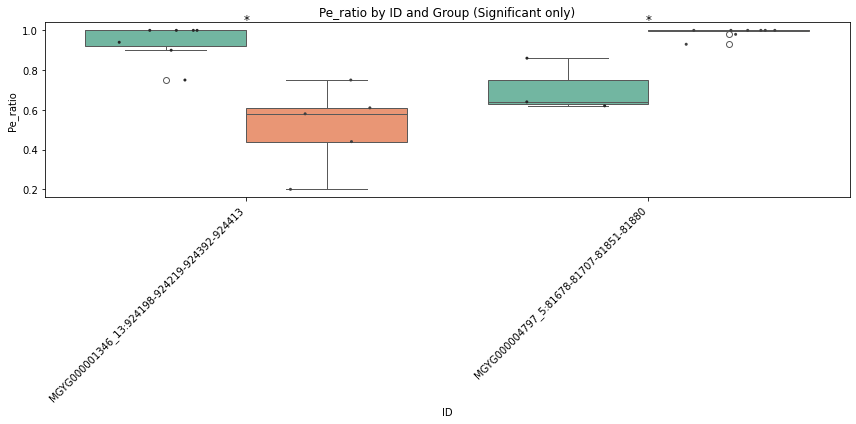

In [139]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=significant_df, x="ID", y="Pe_ratio", hue="group", palette="Set2")
sns.stripplot(data=significant_df, x="ID", y="Pe_ratio", hue="group",
              dodge=True, color=".25", size=3, jitter=0.25)

for i, mag_id in enumerate(significant_df["ID"].unique()):
    plt.text(i, significant_df[significant_df["ID"]==mag_id]["Pe_ratio"].max() + 0.02,
             "*", ha='center', va='bottom', fontsize=12)

plt.ylabel("Pe_ratio")
plt.title("Pe_ratio by ID and Group (Significant only)")
plt.xticks(rotation=45, ha='right')
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.savefig("Pe_ratio_significant_only.pdf")
plt.show()

In [11]:
#MGYG000001346
#MGYG000004797

#filtered_species_metadata[filtered_species_metadata['MAG_ID']=='MGYG000001346']
metadata_species[
    metadata_species['MAG_ID'].isin(['MGYG000001346', 'MGYG000004797'])
]

MAG_ID                Species
1085  MGYG000001346  Bacteroides uniformis
3497  MGYG000004797   Phocaeicola sartorii

In [7]:
pwd

'/Users/dj3371/Library/CloudStorage/OneDrive-PrincetonUniversity/Documents/Inverton_analysis/jupyter_notebook'

In [10]:
metadata_species = pd.read_csv("../metadata/filtered_metadata_species_nonempty.tsv",sep = '\t')
metadata_species

MAG_ID                        Species
0     MGYG000000001      GCA-900066495 sp902362365
1     MGYG000000002               Blautia_A faecis
2     MGYG000000003               Alistipes shahii
3     MGYG000000004      Anaerotruncus colihominis
4     MGYG000000005  Terrisporobacter glycolicus_A
...             ...                            ...
3552  MGYG000004899        Bacteroides sp900555635
3553  MGYG000004900           UMGS1293 sp900550385
3554  MGYG000004902               An23 sp900545755
3555  MGYG000004903            Blautia sp900555025
3556  MGYG000004905            UBA7488 sp002477185

[3557 rows x 2 columns]

In [58]:
df=out_all
df["MGYG_ID"] = df["ID"].apply(lambda x: x.split("_")[0])
df["suffix"] = df["ID"].apply(lambda x: "_".join(x.split("_")[1:]))

# Create summary table
summary_table = df.groupby("MGYG_ID").agg(
    num_unique_suffixes=pd.NamedAgg(column="suffix", aggfunc="nunique"),
    total_occurrences=pd.NamedAgg(column="ID", aggfunc="count")
).reset_index()

print(summary_table)

           MGYG_ID  num_unique_suffixes  total_occurrences
0    MGYG000000003                    3                 10
1    MGYG000000013                   10                 21
2    MGYG000000022                    1                  1
3    MGYG000000029                    1                  2
4    MGYG000000035                    1                  2
..             ...                  ...                ...
108  MGYG000004658                    2                  6
109  MGYG000004741                    2                 20
110  MGYG000004753                    1                  1
111  MGYG000004797                    3                 16
112  MGYG000004879                    1                  1

[113 rows x 3 columns]


In [44]:
out_all["MG_ID"] = out_all["ID"].str.extract(r'^(MGYG\d+)')

In [45]:
unique_count = out_all["MG_ID"].nunique()
unique_ids = out_all["MG_ID"].unique()
unique_count
#113 Unique MAG ID

113

In [46]:
unique_ids = out_all["MG_ID"].unique()

In [10]:
#species_metadata = pd.read_csv('../metadata/filtered_metadata_species_nonempty.tsv', sep = '\t')

In [48]:
filtered_species_metadata = metadata[metadata['MAG_ID'].isin(unique_ids)]

In [153]:
filtered_species_metadata

MAG_ID                                           taxonomy  \
2     MGYG000000003  d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...   
12    MGYG000000013  d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...   
21    MGYG000000022  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...   
28    MGYG000000029  d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...   
34    MGYG000000035  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...   
...             ...                                                ...   
4496  MGYG000004658  d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...   
4579  MGYG000004741  d__Bacteria;p__Firmicutes;c__Bacilli;o__RF39;f...   
4591  MGYG000004753  d__Bacteria;p__Firmicutes;c__Bacilli;o__RF39;f...   
4635  MGYG000004797  d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...   
4717  MGYG000004879  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...   

               p__          c__              o__              f__  \
2     Bacteroidota  Bacteroidia    Bacteroidales    Rikenellaceae   
12    Bacteroidota  Bacteroidia    Bacteroidales   Bacteroidaceae   
21    Firmicutes_A   Clostridia  Oscillospirales  Ruminococcaceae   
28    Bacteroidota  Bacteroidia    Bacteroidales   Bacteroidaceae   
34    Firmicutes_A   Clostridia   Lachnospirales  Lachnospiraceae   
...            ...          ...              ...              ...   
4496  Bacteroidota  Bacteroidia    Bacteroidales    Rikenellaceae   
4579    Firmicutes      Bacilli             RF39           UBA660   
4591    Firmicutes      Bacilli             RF39           UBA660   
4635  Bacteroidota  Bacteroidia    Bacteroidales   Bacteroidaceae   
4717  Firmicutes_A   Clostridia   Lachnospirales  Lachnospiraceae   

                   g__                             s__  
2            Alistipes                Alistipes shahii  
12         Bacteroides         Bacteroides sp902362375  
21    Faecalibacterium  Faecalibacterium prausnitzii_C  
28         Bacteroides          Bacteroides finegoldii  
34           Blautia_A     Blautia_A hydrogenotrophica  
...                ...                             ...  
4496         Alistipes            Alistipes finegoldii  
4579           CAG-877                                  
4591            RUG705                                  
4635       Phocaeicola            Phocaeicola sartorii  
4717     Clostridium_N                                  

[113 rows x 8 columns]

In [4]:
#missing 7 MAG_ID species name
metadata = pd.read_csv("../../metadata/filtered_metadata.tsv", sep = '\t', header = None)
metadata.columns = ["MAG_ID", "taxonomy"]

In [34]:
# Remove the last row
metadata = metadata.iloc[:-1, :]  # keeps all rows except the last
metadata

MAG_ID                                           taxonomy
0     MGYG000000001  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__P...
1     MGYG000000002  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...
2     MGYG000000003  d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...
3     MGYG000000004  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...
4     MGYG000000005  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__P...
...             ...                                                ...
4739  MGYG000004901  d__Bacteria;p__Desulfobacterota;c__Desulfovibr...
4740  MGYG000004902  d__Bacteria;p__Synergistota;c__Synergistia;o__...
4741  MGYG000004903  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...
4742  MGYG000004904  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__T...
4743  MGYG000004905  d__Bacteria;p__Proteobacteria;c__Alphaproteoba...

[4744 rows x 2 columns]

In [35]:
# Function to extract all ranks
def extract_taxonomy_ranks(tax):
    parts = tax.split(";")
    ranks = {"p__": None, "c__": None, "o__": None, "f__": None, "g__": None, "s__": None}
    for part in parts:
        for key in ranks.keys():
            if part.startswith(key):
                ranks[key] = part.replace(key, "")
    return pd.Series(ranks)

#apply to metadata
metadata = metadata.copy()
metadata[["p__", "c__", "o__", "f__", "g__", "s__"]] = metadata["taxonomy"].apply(extract_taxonomy_ranks)

In [56]:
# Check if any genus is missing (None or empty)
missing_genus = filtered_species_metadata["g__"].isna() | (filtered_species_metadata["g__"] == "")

# Number of rows with missing genus
num_missing = missing_genus.sum()
print(f"Number of rows with missing genus: {num_missing}")

# Check if all rows have genus
all_have_genus = not missing_genus.any()
print(f"Do all rows have genus? {all_have_genus}")

Number of rows with missing genus: 0
Do all rows have genus? True


In [60]:
combined_df = pd.merge(
    filtered_species_metadata,
    summary_table,
    left_on="MAG_ID",   # column in filtered_species_metadata
    right_on="MGYG_ID", # column in summary_table
    how="left"          # keep all rows in filtered_species_metadata
)

# Optional: drop duplicate MGYG_ID column after merge
combined_df = combined_df.drop(columns=["MGYG_ID"])

In [61]:
combined_df

MAG_ID                                           taxonomy  \
0    MGYG000000003  d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...   
1    MGYG000000013  d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...   
2    MGYG000000022  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...   
3    MGYG000000029  d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...   
4    MGYG000000035  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...   
..             ...                                                ...   
108  MGYG000004658  d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...   
109  MGYG000004741  d__Bacteria;p__Firmicutes;c__Bacilli;o__RF39;f...   
110  MGYG000004753  d__Bacteria;p__Firmicutes;c__Bacilli;o__RF39;f...   
111  MGYG000004797  d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...   
112  MGYG000004879  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...   

              p__          c__              o__              f__  \
0    Bacteroidota  Bacteroidia    Bacteroidales    Rikenellaceae   
1    Bacteroidota  Bacteroidia    Bacteroidales   Bacteroidaceae   
2    Firmicutes_A   Clostridia  Oscillospirales  Ruminococcaceae   
3    Bacteroidota  Bacteroidia    Bacteroidales   Bacteroidaceae   
4    Firmicutes_A   Clostridia   Lachnospirales  Lachnospiraceae   
..            ...          ...              ...              ...   
108  Bacteroidota  Bacteroidia    Bacteroidales    Rikenellaceae   
109    Firmicutes      Bacilli             RF39           UBA660   
110    Firmicutes      Bacilli             RF39           UBA660   
111  Bacteroidota  Bacteroidia    Bacteroidales   Bacteroidaceae   
112  Firmicutes_A   Clostridia   Lachnospirales  Lachnospiraceae   

                  g__                             s__  num_unique_suffixes  \
0           Alistipes                Alistipes shahii                    3   
1         Bacteroides         Bacteroides sp902362375                   10   
2    Faecalibacterium  Faecalibacterium prausnitzii_C                    1   
3         Bacteroides          Bacteroides finegoldii                    1   
4           Blautia_A     Blautia_A hydrogenotrophica                    1   
..                ...                             ...                  ...   
108         Alistipes            Alistipes finegoldii                    2   
109           CAG-877                                                    2   
110            RUG705                                                    1   
111       Phocaeicola            Phocaeicola sartorii                    3   
112     Clostridium_N                                                    1   

     total_occurrences  
0                   10  
1                   21  
2                    1  
3                    2  
4                    2  
..                 ...  
108                  6  
109                 20  
110                  1  
111                 16  
112                  1  

[113 rows x 10 columns]

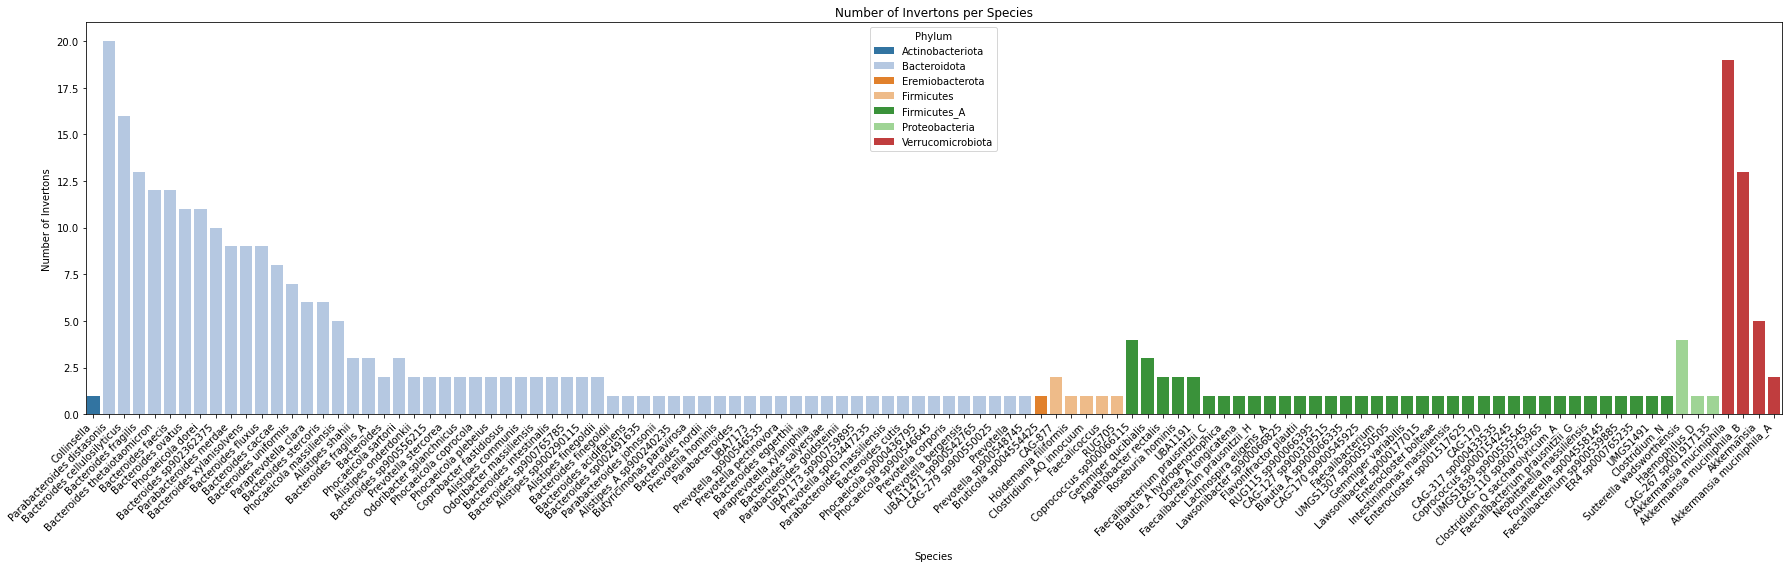

In [85]:
# # Plot with seaborn
# plt.figure(figsize=(25, 5))
# sns.barplot(
#     data=combined_df,
#     x="tax_label",
#     y="num_unique_suffixes",
#     hue="tax_label",     # assign x to hue
#     dodge=False,         # prevent splitting bars
#     palette="viridis",
#     legend=False         # no legend needed
# )

# plt.xlabel("Species")
# plt.ylabel("Number of Invertons")
# plt.title("Number of Invertons per MAG")
# plt.xticks(rotation=45, ha="right")
# plt.tight_layout()
# plt.show()
# Use s__ if not empty, else g__ for x-axis labels
combined_df["tax_label"] = combined_df.apply(
    lambda row: row["s__"] if row["s__"] != "" else row["g__"], axis=1
)

# Sort by phylum first, then by num_unique_suffixes descending
combined_df.sort_values(by=["p__", "num_unique_suffixes"], ascending=[True, False], inplace=True)

# Keep the order in the plot
order = combined_df["tax_label"]

# Plot with color based on p__ (phylum)
plt.figure(figsize=(25, 8))
sns.barplot(
    data=combined_df,
    x="tax_label",
    y="num_unique_suffixes",
    hue="p__",
    dodge=False,
    palette="tab20",
    order=order,
    errorbar=None
)

plt.xlabel("Species")
plt.ylabel("Number of Invertons")
plt.title("Number of Invertons per Species")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Phylum")
plt.tight_layout()
#plt.show()
plt.savefig("num_unique_inverton_by_phylum.pdf")